In [1]:
import pandas as pd

df = pd.read_csv('../data/dataset_fixed.csv')
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
num_df = df.select_dtypes(include=np.number)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)


In [5]:
num_df.head()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,43,263,10,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,48,126,14,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,94,207,14,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,116,207,12,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,84,133,15,144,65,23,80,14,63,11,6


In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


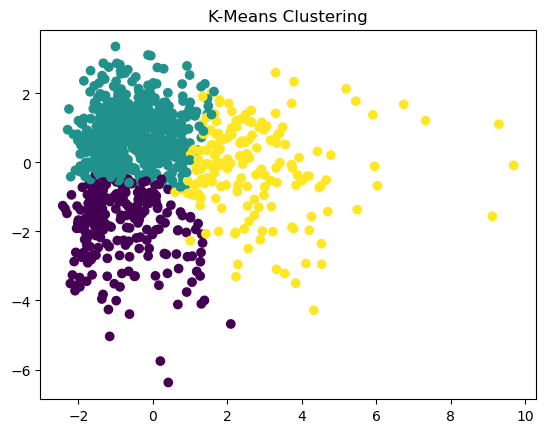

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
plt.title("K-Means Clustering")
plt.show()


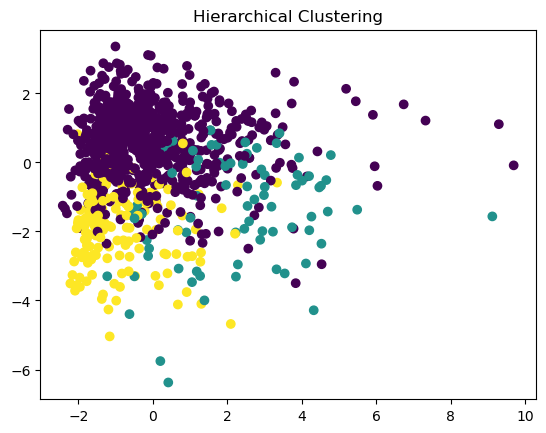

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
labels_hc = hc.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_hc)
plt.title("Hierarchical Clustering")
plt.show()


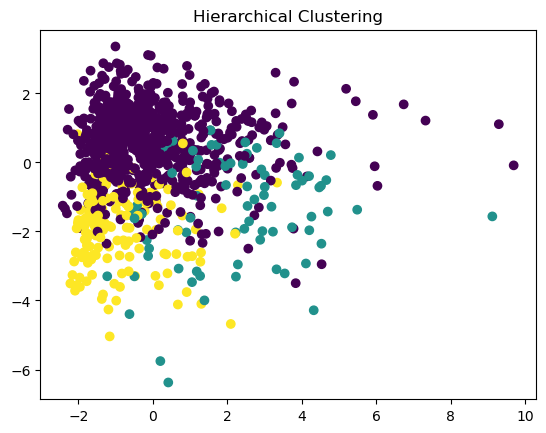

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
labels_hc = hc.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_hc)
plt.title("Hierarchical Clustering")
plt.show()


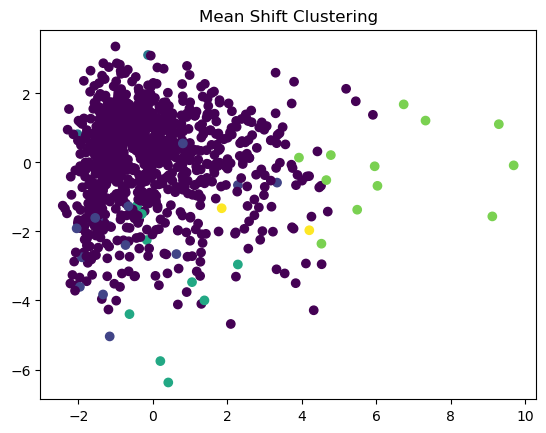

In [10]:
from sklearn.cluster import MeanShift

ms = MeanShift()
labels_ms = ms.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_ms)
plt.title("Mean Shift Clustering")
plt.show()


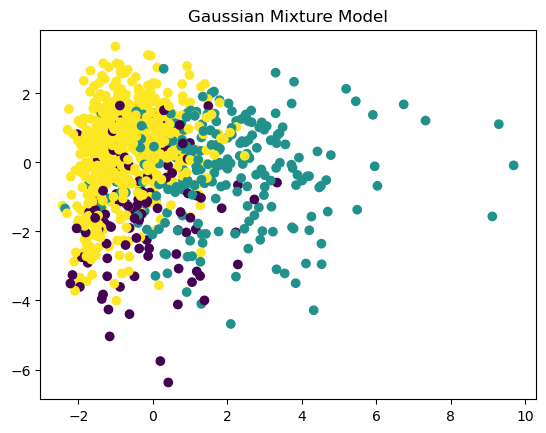

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm)
plt.title("Gaussian Mixture Model")
plt.show()


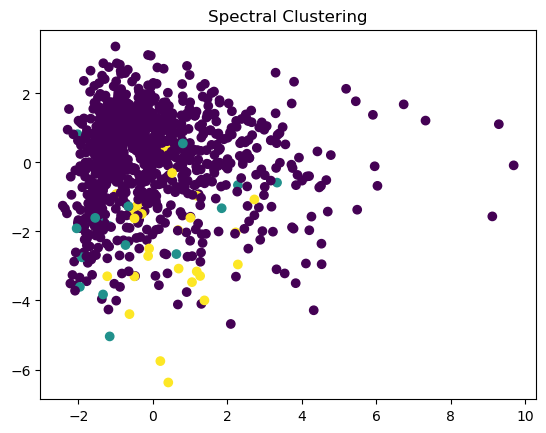

In [12]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels_sc = sc.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_sc)
plt.title("Spectral Clustering")
plt.show()


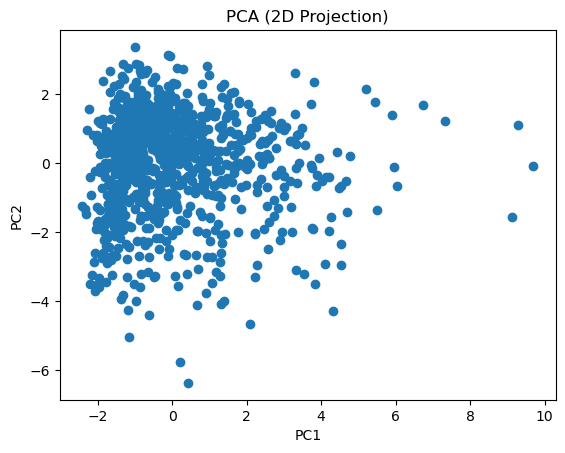

In [13]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA (2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
